#### **Welcome to Assignment 2**
This assignment consists of three parts. Part-1 is based on the content you learned in Week-3 of course and Part-2 is based on the content you learned in Week-4 of the course. Part-3 is **un-graded** and mainly designed to help you flex the Deep Learning muscles grown in Part-2. 

Unlike the first two parts, you'll have to implement everything from scratch in Part-3. If you find answers to questions in Part-3, feel free to head out to the forums and discuss them with your classmates!

#### **Instructions**
1. Use Python 3.x to run this notebook
2. Write your code only in between the lines 'YOUR CODE STARTS HERE' and 'YOUR CODE ENDS HERE'.
you should not change anything else in the code cells, if you do, the answers you are supposed to get at the end of this assignment might be wrong.
3. Read documentation of each function carefully.
4. All the Best!

# Part-1

In [4]:
# Imports
import numpy as np
import cv2
import matplotlib.pyplot as plt
from PIL import Image

# %matplotlib inline uncomment this line if you're running this notebook on your local PC

In [5]:
# DO NOT CHANGE THIS CODE
np.random.seed(10)

### Question 1 : Line detection from a given image.


Find the starting and ending point co-ordinates of detected lines of a given image (line.png) using hough transform.

Following criterion need to be satisfied to qualify as a line:

(a) Minimum line length = 60;
(b) Maximum allowed gap between line segments = 250;
(c) Accumulator threshold parameter = 15  (only those lines are returned that get enough votes);
(d) Distance resolution of the accumulator in pixels = 1;
(e) Angle resolution of the accumulator in radians = pi/180



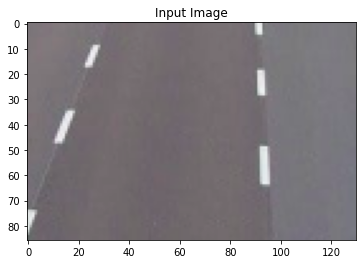

[0, 83] [25, 9]
[92, 0] [95, 64]
[1, 81] [27, 9]
[90, 0] [92, 63]


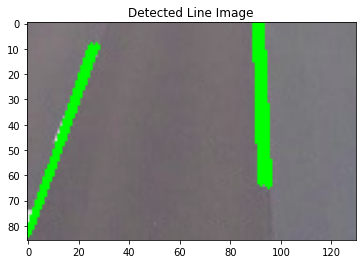

In [29]:
#Read image 
img = cv2.imread('line.png', cv2.IMREAD_COLOR)

# Visualize the input image
plt.imshow(img)
plt.title('Input Image')
plt.show()

#### YOUR CODE STARTS HERE #####
#convert the image to gray-scale

gray =  cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

#### YOUR CODE ENDS HERE #####

#Find the edges in the image using canny detector

edges = cv2.Canny(gray, 50, 200)

#### YOUR CODE STARTS HERE #####

lines = cv2.HoughLinesP(edges,1,np.pi/180,15,minLineLength = 60 ,maxLineGap = 250)
for line in lines:
  x1,y1,x2,y2 =line[0]
  cv2.line(img,(x1,y1),(x2,y2),(0,255,0),2)
  print([x1,y1],[x2,y2])
#### YOUR CODE ENDS HERE #####
plt.imshow(img)
plt.title('Detected Line Image')
plt.show()

##Question 2: Point matching using RANSAC

Given two sets of points related by affine transformation(with an outlier rate), use the RANSAC method to estimate the Affine transformation parameters between them and the number of inliers(Matching points).

What is the estimated number of inliers for an outlier rate of 0.9?


In [7]:
import numpy as np
np.random.seed(0)


# Affine Transformation
# |x'|  = |a, b| * |x|  +  |tx|
# |y'|    |c, d|   |y|     |ty|
# points_t =    A   * points_s  + t

# -------------------------------------------------------------

class Transform():

    def create_case(self, out_rate):
        ''' CREATE_CASE

            Method to generate a test case for affine transformation

            Input arguments:
            - out_rate : the percentage of outliers in test case

            Outputs:
            - points_s : Source points that will be transformed
            - points_t : warped points
            - A, t : parameters of affine transformation, A is a 2x2
            matrix, t is a 2x1 vector, both of them are created randomly

        '''


        # Generate an affine transformation
        # A is a 2x2 matrix, with values in range -2 to 2
        A = 4 * np.random.rand(2, 2) - 2

        # t is a 2x1 vector, with values in range -10 to 10
        t = 20 * np.random.rand(2, 1) - 10

        # Set the num_points = 1000 for the test case
        num_points = 1000

        #### YOUR CODE STARTS HERE ####
        # Compute the no. of outliers and the no. of inliers respectively

        outliers = int(out_rate*num_points)
        inliers = int(num_points-outliers)

        #### YOUR CODE ENDS HERE ####

        # Gernerate source points, with scope from (0,0) to (100, 100)
        points_s = 100 * np.random.rand(2, num_points)

        # Initialization of the warped points matrix
        points_t = np.zeros((2, num_points))

        #### YOUR CODE STARTS HERE ####
        # Compute inliers in warped points matrix by applying A and t
        points_t[:, :inliers]=  np.matmul( A , points_s[:,:inliers] ) + t
        #### YOUR CODE ENDS HERE ####

        # Outliers in warped points matrix
        points_t[:, int(inliers):] = 100 * np.random.rand(2, int(outliers))

        # Reset the order of warped points matrix
        # outliers and inliers will scatter randomly in test case
        rand_inx = np.random.permutation(num_points)
        points_s = points_s[:, rand_inx]
        points_t = points_t[:, rand_inx]

        return A, t, points_s, points_t

    def affine_transformation(self, points_s, points_t):  
        ''' AFFINE_TRANSFORMATION

            Perform affine transformation

            Input arguments:
            - points_t : points in target image
            - points_s : points in source image

            Outputs:

            - A, t : the affine transformation, A is a 2x2 matrix
            that indicates the rotation and scaling transformation,
            t is a 2x1 vector determines the translation

            Method:

            To estimate an affine transformation between two images,
            at least 3 corresponding points are needed.
            In this case, 6-parameter affine transformation are taken into
            consideration, which is shown as follows:

            | x' | = | a b | * | x | + | tx |
            | y' |   | c d |   | y |   | ty |

            For 3 corresponding points, 6 equations can be formed as below:

            | x1 y1 0  0  1 0 |       | a  |       | x1' |
            | 0  0  x1 y1 0 1 |       | b  |       | y1' |
            | x2 y2 0  0  1 0 |   *   | c  |   =   | x2' |
            | 0  0  x2 y2 0 1 |       | d  |       | y2' |
            | x3 y3 0  0  1 0 |       | tx |       | x3' |
            | 0  0  x3 y3 0 1 |       | ty |       | y3' |

            |------> M <------|   |-> theta <-|   |-> b <-|

            Solve the equation by calculating:  theta = M \ b
            Thus, affine transformation can be obtained as:

            A = | a b |     t = | tx |
                | c d |         | ty |

        '''

        #### YOUR CODE STARTS HERE ####
        source=np.squeeze(points_s)

        M=[[source[0,0],source[1,0],0,0,1,0],
          [0,0,source[0,0],source[1,0],0,1],
          [source[0,1],source[1,1],0,0,1,0],
          [0,0,source[0,1],source[1,1],0,1],
          [source[0,2],source[1,2],0,0,1,0],
          [0,0,source[0,2],source[1,2],0,1]]

        target=np.squeeze(points_t)

        b=[target[0,0],target[1,0],target[0,1],target[1,1],target[0,2],target[1,2]]

        theta=np.matmul(np.linalg.pinv(M),b)

        A=[
           [theta[0],theta[1]],
           [theta[2],theta[3]]
          ]

        t=[[theta[4]],[theta[5]]]

        return A,t
        #### YOUR CODE ENDS HERE ####
# -------------------------------------------------------------

# Create instance
tf = Transform()

# Generate a test case as validation with
# a rate of outliers
out_rate = 0.90
A_true, t_true, points_s, points_t = tf.create_case(out_rate)

# At least 3 corresponding points to
# estimate affine transformation
L = 3
# Randomly select 3 pairs of points to do estimation

idx = np.random.randint(0, points_s.shape[1], (L, 1))

A_test, t_test = tf.affine_transformation(points_s[:, idx], points_t[:, idx])

# -------------------------------------------------------------
# Test Class RansacClass
# The number of iterations in RANSAC
ITER_NUM = 2000


class RansacClass():

    def __init__(self, L=3, thr=1): 
        ''' __INIT__

            Initialize the instance.

            Input arguments:

            - L : the number of corresponding points,
            default is 3
            - thr : threshold that determines which points are inliers
            by comparing residual with it

        '''

        self.L = L
        self.thr = thr

    def calculate_distance(self, A, t, points_s, points_t):     
        ''' CALCULATE_DISTANCE

            Compute residual length between estimation and 
            real target points.
 

            Input arguments:

            - A, t : the estimated affine transformation
                     (using least square)
            - points_s : key points taken from source image
            - points_t : key points taken from target image

            Output:

            - residual : Euclidean distance between target 
            points and estimated points. Euclidean distance is
            nothing but the residual length

        '''


        ###YOUR CODE START HERE
       
        points_t_pred= np.dot(A,points_s)+t
        
        residual=((points_t-points_t_pred)**2).sum(axis=0)
        
        residual=residual**0.5

        return residual


        ###YOUR CODE ENDS HERE

    def apply_ransac(self, points_s, points_t):
        ''' APPLY_RANSAC

            Use this method to get the estimateda ffine 
            transformation, also inliers.

            Input arguments:

            - points_s : key points from source image
            - points_t : key points from target image

            Output:

            - A, t : estimated affine transformation
            - inliers : indices of inliers 

        '''
        #### YOUR CODE START HERE
        
        ans=0
        tf=Transform()
        ITER_NUM=2000
        for i in range(ITER_NUM):
          idx = np.random.randint(0, points_s.shape[1], (L, 1)) #sample L indexes

          A_test, t_test = tf.affine_transformation(points_s[:, idx], points_t[:, idx]) 

          residual=self.calculate_distance( A_test, t_test, points_s, points_t)

          current=(residual<self.thr).sum()

          if(ans<current):
            ans=current
            A_ans=A_test
            t_ans=t_test
            inliers=np.where(residual<self.thr)
        
        return A_ans, t_ans, inliers
        #### YOUR CODE ENDS HERE
# -------------------------------------------------------------

# Create instance
rs = RansacClass(L=3, thr=1)

residual = rs.calculate_distance(A_test, t_test, points_s, points_t)
A_rsc, t_rsc, inliers = rs.apply_ransac(points_s, points_t)

# print the number of inliners or point matches
print(inliers[0].shape)

(101,)


### Question 3: Detect corners in a given image using Harris Corner Detection Algorithm

Find the number of detected corner points in a given image (line.png) using Harris Corner Detection Algorithm. Note that, Following criterion MUST be satisfied while applying Harris Corner detection Algorithm:

(a)  The size of neighbourhood considered for corner detection = 2.
(b)  Aperture parameter of Sobel derivative used = 3.
(c)  Harris detector free parameter in the equation = 0.04.

How many corners are detected?



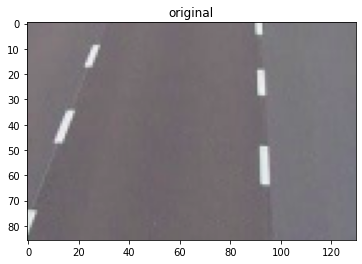

222 detected corner points


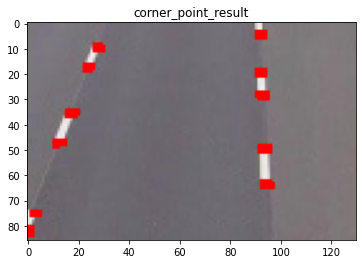

In [8]:
import matplotlib.pyplot as plt
import numpy as np
import cv2

%matplotlib inline

# Read in the image
image = cv2.imread('line.png')
plt.imshow(image)
plt.title("original")
plt.show()
# Make a copy of the image
image_copy = np.copy(image)

# Change color to RGB (from BGR)
image_copy = cv2.cvtColor(image_copy, cv2.COLOR_BGR2RGB)

###YOUR CODE STARTS HERE

## STEP 1:  Convert to grayscale 
gray = cv2.cvtColor(image_copy,cv2.COLOR_RGB2GRAY)

## STEP 2: Detect corners 
dst = cv2.cornerHarris(gray,2,3,0.04)

## STEP 3: Dilate corner image to enhance corner points
dst = cv2.dilate(dst,None)

## STEP 4:set threshold value as 0.1 * (maximum value of dilated corner image obtained from STEP3)
image_copy[dst>0.1*dst.max()]=[255,0,0]


## STEP 5: Count numer of detected corner points and draw them on the image
counts=(dst>(0.1*dst.max())).sum()
print(counts,"detected corner points")
plt.imshow(image_copy)
plt.title("corner_point_result")
plt.show()

### YOUR CODE ENDS HERE

# Part-2

In this section, we will train a neural network to learn to identify numerals from [MNIST](http://yann.lecun.com/exdb/mnist/) dataset. Fill out the missing pieces in each of the following cells. 

In [9]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
import torch.nn.functional as F
import timeit
import unittest

## Please DONOT remove these lines. 
torch.manual_seed(0)
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False
np.random.seed(0)



### Data Loading and Pre-processing

In [10]:
# check availability of GPU and set the device accordingly
#### YOUR CODE STARTS HERE ####
device  = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# define a transforms for preparing the dataset
transform = transforms.Compose([transforms.ToTensor(),transforms.Normalize((0.1307),(0.3081))])

# convert the image to a pytorch tensor
# normalise the images with mean (0.1307) and std (0.3081) of the dataset
#### YOUR CODE ENDS HERE ####

In [11]:
# Load the MNIST training, test datasets using `torchvision.datasets.MNIST` using the transform defined above
#### YOUR CODE STARTS HERE ####
train_dataset = datasets.MNIST("",train= True, download= True , transform=transform)
test_dataset = datasets.MNIST("",train= False, download= True , transform=transform)
#### YOUR CODE ENDS HERE ####

Extracting MNIST/raw/train-images-idx3-ubyte.gz to MNIST/raw


Extracting MNIST/raw/train-labels-idx1-ubyte.gz to MNIST/raw


Extracting MNIST/raw/t10k-images-idx3-ubyte.gz to MNIST/raw




Extracting MNIST/raw/t10k-labels-idx1-ubyte.gz to MNIST/raw
Processing...
Done!


/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:480: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:141.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


In [12]:
# create dataloaders for training and test datasets
# use a batch size of 32 and set shuffle=True for the training set
#### YOUR CODE STARTS HERE ####
train_dataloader = torch.utils.data.DataLoader(train_dataset, shuffle= True, batch_size=32)
test_dataloader = torch.utils.data.DataLoader(test_dataset, shuffle= True, batch_size=32)

#### YOUR CODE ENDS HERE ####

### Network Definition

In [13]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        #### YOUR CODE STARTS HERE ####
        # define a conv layer with output channels as 16, kernel size of 3 and stride of 1
        self.conv1=nn.Conv2d(1,16,3,1)
        # define a conv layer with output channels as 32, kernel size of 3 and stride of 1
        self.conv2=nn.Conv2d(16,32,3,1)
        # define a conv layer with output channels as 64, kernel size of 3 and stride of 1
        self.conv3=nn.Conv2d(32,64,3,1)
        # define a max pooling layer with kernel size 2
        self.max_pool=nn.MaxPool2d(kernel_size=2, stride=2)
        # define dropout layer with a probability of 0.25
        self.drop_out1 = nn.Dropout2d(0.25)
        # define dropout layer with a probability of 0.5
        self.drop_out2 = nn.Dropout(0.5)
        # define a linear(dense) layer with 128 output features
        self.fc1 = nn.Linear(7744, 128)
        
        # define a linear(dense) layer with output features corresponding to the number of classes in the dataset
        self.fc2 = nn.Linear(128, 10)
        #### YOUR CODE ENDS HERE ####

    def forward(self, x):
        # Use the layers defined above in a sequential way (folow the same as the layer definitions above) and 
        # write the forward pass, after each of conv1, conv2, conv3 and fc1 use a relu activation. 
        # use the first dropout after maxpool and the other one before you final FC layer
        #### YOUR CODE STARTS HERE ####
        
        out=F.relu(self.conv1(x))
        out=F.relu(self.conv2(out))
        out=F.relu(self.conv3(out))
        out=self.max_pool(out)
        out=self.drop_out1(out)
        out = torch.flatten(out, 1)
        out=F.relu(self.fc1(out))
        out=self.drop_out2(out)
        out=self.fc2(out)

        #### YOUR CODE ENDS HERE ####
        output = F.log_softmax(out, dim=1)
        return output

### Sanity Check
Make sure all the tests below pass without any errors, before you proceed with the training part.

In [14]:
import unittest

class TestImplementations(unittest.TestCase):
    
    # Dataloading tests
    def test_dataset(self):
        self.dataset_classes = ['0 - zero',
                                '1 - one',
                                '2 - two',
                                '3 - three',
                                '4 - four',
                                '5 - five',
                                '6 - six',
                                '7 - seven',
                                '8 - eight',
                                '9 - nine']
        self.assertTrue(train_dataset.classes == self.dataset_classes)
        self.assertTrue(train_dataset.train == True)
    
    def test_dataloader(self):        
        self.assertTrue(train_dataloader.batch_size == 32)
        self.assertTrue(test_dataloader.batch_size == 32)      
         
    def test_total_parameters(self):
        model = Net().to(device)
        self.assertTrue(sum(p.numel() for p in model.parameters()) == 1015946)

suite = unittest.TestLoader().loadTestsFromModule(TestImplementations())
unittest.TextTestRunner().run(suite)

...
----------------------------------------------------------------------
Ran 3 tests in 10.162s

OK


<unittest.runner.TextTestResult run=3 errors=0 failures=0>

### Training and Inference

In [15]:
def train(model, device, train_loader, optimizer, epoch):
    model.train()
    for batch_idx, (data, target) in enumerate(train_loader):
      #### YOUR CODE STARTS HERE ####
        # send the image, target to the device
        data, target = data.to(device), target.to(device)
        # flush out the gradients stored in optimizer
        optimizer.zero_grad()
        # pass the image to the model and assign the output to variable named output
        output = model(data)
        # calculate the loss (use nll_loss in pytorch)
        loss = F.nll_loss(output, target)
        # do a backward pass
        loss.backward()
        # update the weights
        optimizer.step()
      
      #### YOUR CODE ENDS HERE ####
        if batch_idx % 20 == 0:
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                epoch, batch_idx * len(data), len(train_loader.dataset),
                100. * batch_idx / len(train_loader), loss.item()))

In [16]:
def test(model, device, test_loader):
    model.eval()
    test_loss = 0
    correct = 0
    with torch.no_grad():
        for data, target in test_loader:
          ### YOUR CODE STARTS HERE ####
            # send the image, target to the device
            data, target = data.to(device), target.to(device)
            # pass the image to the model and assign the output to variable named output
            output = model(data)
            test_loss += F.nll_loss(output, target, reduction='sum').item()  # sum up batch loss
            pred = output.argmax(dim=1, keepdim=True)
          #### YOUR CODE ENDS HERE ####
            # get the index of the max log-probability
            correct += pred.eq(target.view_as(pred)).sum().item()

    test_loss /= len(test_loader.dataset)

    print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
        test_loss, correct, len(test_loader.dataset),
        100. * correct / len(test_loader.dataset)))

### Question 4

Use Adam as the optimiser and train the model for 25 epochs. Report the train, test loss and accuracies along with the total time taken for training. (Use plots if required)

In [17]:
import torch.optim as optim
import time

net= Net()
optimizer = optim.Adam(net.parameters(), lr=0.0001)
model = net.to(device)
epochs = 25

start_time = time.time()

for epoch in range(epochs):
  train(model, device, train_dataloader, optimizer, epoch)

end_time=time.time()

Train Epoch: 0 [0/60000 (0%)]	Loss: 2.306945
Train Epoch: 0 [640/60000 (1%)]	Loss: 2.181118
Train Epoch: 0 [1280/60000 (2%)]	Loss: 1.860361
Train Epoch: 0 [1920/60000 (3%)]	Loss: 1.231366
Train Epoch: 0 [2560/60000 (4%)]	Loss: 0.916789
Train Epoch: 0 [3200/60000 (5%)]	Loss: 0.748262
Train Epoch: 0 [3840/60000 (6%)]	Loss: 0.779646
Train Epoch: 0 [4480/60000 (7%)]	Loss: 0.905150
Train Epoch: 0 [5120/60000 (9%)]	Loss: 0.616223
Train Epoch: 0 [5760/60000 (10%)]	Loss: 0.418032
Train Epoch: 0 [6400/60000 (11%)]	Loss: 1.115914
Train Epoch: 0 [7040/60000 (12%)]	Loss: 0.320603
Train Epoch: 0 [7680/60000 (13%)]	Loss: 0.355148
Train Epoch: 0 [8320/60000 (14%)]	Loss: 0.592559
Train Epoch: 0 [8960/60000 (15%)]	Loss: 0.368017
Train Epoch: 0 [9600/60000 (16%)]	Loss: 0.802442
Train Epoch: 0 [10240/60000 (17%)]	Loss: 0.617944
Train Epoch: 0 [10880/60000 (18%)]	Loss: 0.626470
Train Epoch: 0 [11520/60000 (19%)]	Loss: 0.529727
Train Epoch: 0 [12160/60000 (20%)]	Loss: 0.435194
Train Epoch: 0 [12800/60000 (

In [18]:
print("Test loss and accuracy")
test(model,device, test_dataloader)
print("Time taken to train", end_time-start_time)

Test loss and accuracy

Test set: Average loss: 0.0259, Accuracy: 9926/10000 (99%)

Time taken to train 367.0818405151367


### Question 5

Modify the network defined in the previous step to replace ReLU activations with Sigmoid and report the final test accuracy. Is there a drop in accuracy, what do you think is the reason? 

In [19]:
#modifying previous Net class with ReLU activation to Net5 which contain Sigmoid activation.
class Net5(nn.Module):
    def __init__(self):
        super(Net5, self).__init__()
        #### YOUR CODE STARTS HERE ####
        # define a conv layer with output channels as 16, kernel size of 3 and stride of 1
        self.conv1=nn.Conv2d(1,16,3,1)
        # define a conv layer with output channels as 32, kernel size of 3 and stride of 1
        self.conv2=nn.Conv2d(16,32,3,1)
        # define a conv layer with output channels as 64, kernel size of 3 and stride of 1
        self.conv3=nn.Conv2d(32,64,3,1)
        # define a max pooling layer with kernel size 2
        self.max_pool=nn.MaxPool2d(kernel_size=2, stride=2)
        # define dropout layer with a probability of 0.25
        self.drop_out1 = nn.Dropout2d(0.25)
        # define dropout layer with a probability of 0.5
        self.drop_out2 = nn.Dropout(0.5)
        # define a linear(dense) layer with 128 output features
        self.fc1 = nn.Linear(7744, 128)
        
        # define a linear(dense) layer with output features corresponding to the number of classes in the dataset
        self.fc2 = nn.Linear(128, 10)
        #### YOUR CODE ENDS HERE ####

    def forward(self, x):
        # Use the layers defined above in a sequential way (folow the same as the layer definitions above) and 
        # write the forward pass, after each of conv1, conv2, conv3 and fc1 use a relu activation. 
        # use the first dropout after maxpool and the other one before you final FC layer
        #### YOUR CODE STARTS HERE ####
        out=torch.sigmoid(self.conv1(x))
        out=torch.sigmoid(self.conv2(out))
        out=torch.sigmoid(self.conv3(out))
        out=self.max_pool(out)
        out=self.drop_out1(out)
        out = torch.flatten(out, 1)
        out=torch.sigmoid(self.fc1(out))
        out=self.drop_out2(out)
        out=self.fc2(out)

        #### YOUR CODE ENDS HERE ####
        output = F.log_softmax(out, dim=1)
        return output

net5= Net5()
optimizer=optim.Adam(net5.parameters(), lr=0.0001)
model=net5.to(device)
epochs=25

for epoch in range(epochs):
  train(model, device, train_dataloader, optimizer, epoch)


Train Epoch: 0 [0/60000 (0%)]	Loss: 2.282748
Train Epoch: 0 [640/60000 (1%)]	Loss: 2.382996
Train Epoch: 0 [1280/60000 (2%)]	Loss: 2.335191
Train Epoch: 0 [1920/60000 (3%)]	Loss: 2.327359
Train Epoch: 0 [2560/60000 (4%)]	Loss: 2.340654
Train Epoch: 0 [3200/60000 (5%)]	Loss: 2.282733
Train Epoch: 0 [3840/60000 (6%)]	Loss: 2.282271
Train Epoch: 0 [4480/60000 (7%)]	Loss: 2.314925
Train Epoch: 0 [5120/60000 (9%)]	Loss: 2.288435
Train Epoch: 0 [5760/60000 (10%)]	Loss: 2.305690
Train Epoch: 0 [6400/60000 (11%)]	Loss: 2.326709
Train Epoch: 0 [7040/60000 (12%)]	Loss: 2.292184
Train Epoch: 0 [7680/60000 (13%)]	Loss: 2.281292
Train Epoch: 0 [8320/60000 (14%)]	Loss: 2.369608
Train Epoch: 0 [8960/60000 (15%)]	Loss: 2.304598
Train Epoch: 0 [9600/60000 (16%)]	Loss: 2.338062
Train Epoch: 0 [10240/60000 (17%)]	Loss: 2.290223
Train Epoch: 0 [10880/60000 (18%)]	Loss: 2.318572
Train Epoch: 0 [11520/60000 (19%)]	Loss: 2.302035
Train Epoch: 0 [12160/60000 (20%)]	Loss: 2.295523
Train Epoch: 0 [12800/60000 (

### Analysis of Question 5:

In [20]:
print("Test loss and accuracy")
test(model,device, test_dataloader)

Test loss and accuracy

Test set: Average loss: 0.0539, Accuracy: 9840/10000 (98%)



*****
With sigmoid activation, the gradient goes to zero if the input is very large or very small. When the gradient goes to zero, gradient descent tends to have very slow convergence.

So for the same number of epochs we don't get same accuracy as relu activation. 

That's why it does not give better accuracy in comparison to Relu which is used in Question 4.
***

# Question 6

Train the network defined in Question-1 with a different optimiser other than Adam, do you see any difference in performance? Substantiate your observations with relevant explanations.

In [21]:
import torch.optim as optim
net=Net()
optimizer=optim.SGD(net.parameters(), lr=0.001)
model=net.to(device)
epochs=25

for epoch in range(epochs):
  train(model, device, train_dataloader, optimizer, epoch)
  

Train Epoch: 0 [0/60000 (0%)]	Loss: 2.298357
Train Epoch: 0 [640/60000 (1%)]	Loss: 2.285347
Train Epoch: 0 [1280/60000 (2%)]	Loss: 2.308071
Train Epoch: 0 [1920/60000 (3%)]	Loss: 2.290624
Train Epoch: 0 [2560/60000 (4%)]	Loss: 2.293375
Train Epoch: 0 [3200/60000 (5%)]	Loss: 2.297606
Train Epoch: 0 [3840/60000 (6%)]	Loss: 2.303153
Train Epoch: 0 [4480/60000 (7%)]	Loss: 2.299555
Train Epoch: 0 [5120/60000 (9%)]	Loss: 2.282138
Train Epoch: 0 [5760/60000 (10%)]	Loss: 2.276556
Train Epoch: 0 [6400/60000 (11%)]	Loss: 2.277743
Train Epoch: 0 [7040/60000 (12%)]	Loss: 2.305507
Train Epoch: 0 [7680/60000 (13%)]	Loss: 2.284874
Train Epoch: 0 [8320/60000 (14%)]	Loss: 2.243517
Train Epoch: 0 [8960/60000 (15%)]	Loss: 2.274672
Train Epoch: 0 [9600/60000 (16%)]	Loss: 2.241312
Train Epoch: 0 [10240/60000 (17%)]	Loss: 2.277434
Train Epoch: 0 [10880/60000 (18%)]	Loss: 2.277816
Train Epoch: 0 [11520/60000 (19%)]	Loss: 2.255648
Train Epoch: 0 [12160/60000 (20%)]	Loss: 2.241357
Train Epoch: 0 [12800/60000 (

### Analysis for Question 6:

In [22]:
print("Test loss and accuracy")
test(model,device, test_dataloader)

Test loss and accuracy

Test set: Average loss: 0.0822, Accuracy: 9740/10000 (97%)



****  
Using SGD in place of Adam optimizer decreases accuracy slightly because Adam combines the best properties of the AdaGrad and RMSProp algorithms to provide an optimization algorithm that can handle sparse gradients on noisy problems. 
***



# Question 7

Initialize the `Conv2d` layers in the network defined in Question-1 `(Net)` with all ones (both weights and bias). Train the network with Adam optimizer and report the final test accuracy. Is there any difference in the performance? If yes, what do you think is the reason? 

In [23]:
def init_weights(m):
    if type(m) == (nn.Conv2d):
        torch.nn.init.ones_(m.weight)
        m.bias.data.fill_(1)
        

    

net= Net()
net.apply(init_weights)
optimizer=optim.Adam(net.parameters(), lr=0.001)
model=net.to(device)
epochs=25


for epoch in range(epochs):
  train(model, device, train_dataloader, optimizer, epoch)


Train Epoch: 0 [0/60000 (0%)]	Loss: 241938.406250
Train Epoch: 0 [640/60000 (1%)]	Loss: 31.579742
Train Epoch: 0 [1280/60000 (2%)]	Loss: 2.309550
Train Epoch: 0 [1920/60000 (3%)]	Loss: 2.293346
Train Epoch: 0 [2560/60000 (4%)]	Loss: 2.231290
Train Epoch: 0 [3200/60000 (5%)]	Loss: 2.233459
Train Epoch: 0 [3840/60000 (6%)]	Loss: 2.232517
Train Epoch: 0 [4480/60000 (7%)]	Loss: 2.232931
Train Epoch: 0 [5120/60000 (9%)]	Loss: 2.297676
Train Epoch: 0 [5760/60000 (10%)]	Loss: 2.312759
Train Epoch: 0 [6400/60000 (11%)]	Loss: 2.085121
Train Epoch: 0 [7040/60000 (12%)]	Loss: 2.302151
Train Epoch: 0 [7680/60000 (13%)]	Loss: 2.096334
Train Epoch: 0 [8320/60000 (14%)]	Loss: 2.302382
Train Epoch: 0 [8960/60000 (15%)]	Loss: 2.297634
Train Epoch: 0 [9600/60000 (16%)]	Loss: 2.303944
Train Epoch: 0 [10240/60000 (17%)]	Loss: 2.299172
Train Epoch: 0 [10880/60000 (18%)]	Loss: 2.299745
Train Epoch: 0 [11520/60000 (19%)]	Loss: 2.300617
Train Epoch: 0 [12160/60000 (20%)]	Loss: 2.306294
Train Epoch: 0 [12800/6

# Solution 7:

In [24]:
print("Final test accuracy when all weights are initialized 1 for CONV2D layers.")
test(model,device, test_dataloader)

Final test accuracy when all weights are initialized 1 for CONV2D layers.

Test set: Average loss: 2.3010, Accuracy: 1135/10000 (11%)



****
By using all 1's in weights and bias of conv2d layers we are getting test accuracy of 11% which is as good as making random guess as we have only 10 classes and probability of a random guess being right is 1/10. 

So we can conclude that learnig does not happen when all the weights are initialized same. Because by initializing all weights to one, all of the hidden neurons(units) in your neural network will be doing the exact same calculations. 

This is not something we desire because we want different hidden units to compute different functions.
***

### Question 8

Initialize the network defined in Question-1 `(Net)` with Xavier's initialization ([torch.nn.init.xavier_normal](https://pytorch.org/docs/stable/nn.init.html))(for bias use zero). Train the network with Adam optimizer and report the final test accuracy.

In [25]:
def init_weights(m):
    if type(m) == (nn.Linear or nn.Conv2d):
        torch.nn.init.xavier_normal_(m.weight)
        m.bias.data.fill_(0)
    

net= Net()
net.apply(init_weights)
optimizer=optim.Adam(net.parameters(), lr=0.001)
model=net.to(device)
epochs=25


for epoch in range(epochs):
  train(model, device, train_dataloader, optimizer, epoch)

Train Epoch: 0 [0/60000 (0%)]	Loss: 2.310634
Train Epoch: 0 [640/60000 (1%)]	Loss: 1.538895
Train Epoch: 0 [1280/60000 (2%)]	Loss: 0.822763
Train Epoch: 0 [1920/60000 (3%)]	Loss: 0.670218
Train Epoch: 0 [2560/60000 (4%)]	Loss: 0.298610
Train Epoch: 0 [3200/60000 (5%)]	Loss: 0.572591
Train Epoch: 0 [3840/60000 (6%)]	Loss: 0.449313
Train Epoch: 0 [4480/60000 (7%)]	Loss: 0.212954
Train Epoch: 0 [5120/60000 (9%)]	Loss: 0.467216
Train Epoch: 0 [5760/60000 (10%)]	Loss: 0.195088
Train Epoch: 0 [6400/60000 (11%)]	Loss: 0.365709
Train Epoch: 0 [7040/60000 (12%)]	Loss: 0.165273
Train Epoch: 0 [7680/60000 (13%)]	Loss: 0.465293
Train Epoch: 0 [8320/60000 (14%)]	Loss: 0.280169
Train Epoch: 0 [8960/60000 (15%)]	Loss: 0.331296
Train Epoch: 0 [9600/60000 (16%)]	Loss: 0.206844
Train Epoch: 0 [10240/60000 (17%)]	Loss: 0.133710
Train Epoch: 0 [10880/60000 (18%)]	Loss: 0.055523
Train Epoch: 0 [11520/60000 (19%)]	Loss: 0.074830
Train Epoch: 0 [12160/60000 (20%)]	Loss: 0.391366
Train Epoch: 0 [12800/60000 (

### Analysis for Question 8:

In [26]:
print("Test results for Xavier Initialization")
test(model,device, test_dataloader)

Test results for Xavier Initialization

Test set: Average loss: 0.0316, Accuracy: 9933/10000 (99%)



****
The main motivation behind Xavier Initialization is that the weight of neuron does not start in the saturated or dead region.
Weight initialization by Xavier.normal performs better compare to random weight initialier in adam optimizer as expected, but in case of Adam Accuracy increases slightly. 

In theory it has been shown that use of Xavier Initialization with tanh or simoid activation increases accuracy dramatically.

***

### Question 9

Add three batch-norm layers to the network defined in `Question-1` and report the final test accuracy. How does batch-norm help? 

In [33]:

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        #### YOUR CODE STARTS HERE ####
        # define a conv layer with output channels as 16, kernel size of 3 and stride of 1
        self.conv1=nn.Conv2d(1,16,3,1)
        # define a conv layer with output channels as 32, kernel size of 3 and stride of 1
        self.conv2=nn.Conv2d(16,32,3,1)
        # define a conv layer with output channels as 64, kernel size of 3 and stride of 1
        self.conv3=nn.Conv2d(32,64,3,1)
        # define a max pooling layer with kernel size 2
        self.max_pool=nn.MaxPool2d(kernel_size=2, stride=2)
        # define dropout layer with a probability of 0.25
        self.drop_out1 = nn.Dropout2d(0.25)
        # define dropout layer with a probability of 0.5
        self.drop_out2 = nn.Dropout(0.5)
        # define a linear(dense) layer with 128 output features
        self.fc1 = nn.Linear(7744, 128)
        
        # define a linear(dense) layer with output features corresponding to the number of classes in the dataset
        self.fc2 = nn.Linear(128, 10)

        #define batch_norm layer
        self.conv_bn1=nn.BatchNorm2d(16)
        self.conv_bn2=nn.BatchNorm2d(32)
        self.conv_bn3=nn.BatchNorm2d(64)
        #### YOUR CODE ENDS HERE ####

    def forward(self, x):
        # Use the layers defined above in a sequential way (folow the same as the layer definitions above) and 
        # write the forward pass, after each of conv1, conv2, conv3 and fc1 use a relu activation. 
        # use the first dropout after maxpool and the other one before you final FC layer
        #### YOUR CODE STARTS HERE ####
        out=F.relu(self.conv1(x))
        out=self.conv_bn1(out)

        out=F.relu(self.conv2(out))
        out=self.conv_bn2(out)

        out=F.relu(self.conv3(out))
        out=self.conv_bn3(out)

        out=self.max_pool(out)
        out=self.drop_out1(out)
        out = torch.flatten(out, 1)
        
        out=F.relu(self.fc1(out))
        out=self.drop_out2(out)
        out=self.fc2(out)

        #### YOUR CODE ENDS HERE ####
        output = F.log_softmax(out, dim=1)
        return output

In [34]:
net= Net()

optimizer=optim.Adam(net.parameters(), lr=0.001)
model=net.to(device)
epochs=25

for epoch in range(epochs):
  train(model, device, train_dataloader, optimizer, epoch)


Train Epoch: 0 [0/60000 (0%)]	Loss: 2.675155
Train Epoch: 0 [640/60000 (1%)]	Loss: 0.901999
Train Epoch: 0 [1280/60000 (2%)]	Loss: 0.987660
Train Epoch: 0 [1920/60000 (3%)]	Loss: 0.304419
Train Epoch: 0 [2560/60000 (4%)]	Loss: 0.352413
Train Epoch: 0 [3200/60000 (5%)]	Loss: 0.420903
Train Epoch: 0 [3840/60000 (6%)]	Loss: 0.372631
Train Epoch: 0 [4480/60000 (7%)]	Loss: 0.123916
Train Epoch: 0 [5120/60000 (9%)]	Loss: 0.268919
Train Epoch: 0 [5760/60000 (10%)]	Loss: 0.331967
Train Epoch: 0 [6400/60000 (11%)]	Loss: 0.473023
Train Epoch: 0 [7040/60000 (12%)]	Loss: 0.092310
Train Epoch: 0 [7680/60000 (13%)]	Loss: 0.361815
Train Epoch: 0 [8320/60000 (14%)]	Loss: 0.124152
Train Epoch: 0 [8960/60000 (15%)]	Loss: 0.133717
Train Epoch: 0 [9600/60000 (16%)]	Loss: 0.157446
Train Epoch: 0 [10240/60000 (17%)]	Loss: 0.517803
Train Epoch: 0 [10880/60000 (18%)]	Loss: 0.652658
Train Epoch: 0 [11520/60000 (19%)]	Loss: 0.241123
Train Epoch: 0 [12160/60000 (20%)]	Loss: 0.195477
Train Epoch: 0 [12800/60000 (

### Analysis for Question 9:

In [35]:
print("Accuracy and loss of test data on Adam optimer and relu loss using 3 Batch Norm layer on first convolution layers:")
test(model,device, test_dataloader)

Accuracy and loss of test data on Adam optimer and relu loss using 3 Batch Norm layer on first convolution layers:

Test set: Average loss: 0.0309, Accuracy: 9947/10000 (99%)



****
Batch Normalization help recenter and rescale weights over the batch size which act as a regularizer and help our model to learn better generalization. 

Batch norm reduce Internal Covariate Shift and it makes optimization landscapes significantly smoother which induces a more predictive and stable behaviour of gradient.

***

# Part-3 (Optional)

This section is un-graded and purely for practice. 

Main focus of this part is to help you flex the deep learning muscles built in the above part. You should build a network on the [SVHN dataset](http://ufldl.stanford.edu/housenumbers/). This dataset is similar to MNIST but unlike MNIST, the images are colored and more complex. 

As of writing this, the state-of-the-art(SoTA) performance on this dataset is 98.98%. You can try to start with the simple network we defined above for the MNSIT dataset(with some modification for dealing with different sized colored images unlike MNIST). But to achive the SoTA performance you need to do a lot of hackery. These are list of few things, we would encourage you to try: 

- Use data augmentation wisely. Read and understand how to perform the augmentations listed below. 
    * RandomFlips, Color Jittering
    * Cutout, Cutmix
    * Mixup
    * Auto-augment

- Try to increase the image size using standard image interpolation techniques. Try using tricks like Progressive resizing of images and see if it helps. 

- After certain number of layers, adding more layer might not be of much help, run experiments on SVHN and see if you observe this. 

- To understand the difficulties in training deeper networks read this paper: [Deep Residual Learning for Image Recognition](https://arxiv.org/abs/1512.03385)

- To improve the performance on SVHN, try using architectures like [ResNet](https://arxiv.org/abs/1512.03385), [DesnseNet](https://arxiv.org/abs/1608.06993) or [EfficientNet](https://arxiv.org/abs/1905.11946). Most of these architectures are available by default in PyTorch.
